In [3]:
%run setup.ipynb

# Data preprocessing

- data withdraw
- text cleaning (normalization)
  - lower casing
  - removal of URL's
  - removal of special symbols
  - removal of hashing
  - remove stop words
- lemmatizaion
- stemming

#### Import package 'NLTK' for building Python programs to work with human language data
#### Import package 'NUMPY','PANDAS' for processing the original data
#### Import package 'RE' to regular expression matching operations

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import numpy as np
import re

import string

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/baihaicen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/baihaicen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Creat two dataframes to withdraw train data and test data

**Note** : Default format 'utf-8' codec can not decode byte 0xc2 in the train data,
           here select 'latin-1' as continuation byte

In [5]:
train = pd.read_csv(f"{DATA_PATH}/Corona_NLP_train.csv", encoding='latin-1')
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Dispaly train data, 6 columns (attributes) in the dataframe. Focus on 'OriginalTweet'

In [6]:
test = pd.read_csv(f"{DATA_PATH}/Corona_NLP_test.csv")
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


Dispaly test data, 6 columns (attributes) in the dataframe. Focus on 'OriginalTweet'

#### Combining both train data and test data as one dataframe for processing. Test data follows train data below. 

In [7]:
combi = train.append(test, ignore_index=True)
combi

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
44950,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
44951,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
44952,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
44953,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


#### To create a coulmn, names 'tweet' and is attached in the end of atrributes in the dataframe combi, which includes all the content as 'OriginalTweet'. Building a loop function to find *all* the matches and returns them as a list of strings, with each string representing one match. 

In [8]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

#### Create an attribute 'tweet' matches any character contained in the character class 'OriginalTweet', except handle, in this work, the essential handle is a mention of username.

In [9]:
combi['tweet'] = np.vectorize(remove_pattern)(combi['OriginalTweet'],"@[\w]*")
combi

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,https://t.co/iFz9FAn2Pa and https://t.co/xX...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."
...,...,...,...,...,...,...,...
44950,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,Meanwhile In A Supermarket in Israel -- People...
44951,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,Did you panic buy a lot of non-perishable item...
44952,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,Asst Prof of Economics was on talking about ...
44953,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,Gov need to do somethings instead of biar je r...


#### The conversion of all text in attribute 'tweet' to lower case

In [10]:
combi['tweet'] = combi['tweet'].str.lower()
combi['tweet']

0           https://t.co/ifz9fan2pa and https://t.co/xx...
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the #cov...
                               ...                        
44950    meanwhile in a supermarket in israel -- people...
44951    did you panic buy a lot of non-perishable item...
44952    asst prof of economics  was on  talking about ...
44953    gov need to do somethings instead of biar je r...
44954    i and  members are committed to the safety of ...
Name: tweet, Length: 44955, dtype: object

#### Removol of irrelevant links embedded into Twitter posts

In [11]:
combi['tweet'] = combi['tweet'].str.replace("https*\S+", " ")
combi['tweet']

/var/folders/22/tjhpw2r91370hgz2gq4kcf980000gn/T/ipykernel_12250/2329953310.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tweet'] = combi['tweet'].str.replace("https*\S+", " ")


0                                              and   and  
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the #cov...
                               ...                        
44950    meanwhile in a supermarket in israel -- people...
44951    did you panic buy a lot of non-perishable item...
44952    asst prof of economics  was on  talking about ...
44953    gov need to do somethings instead of biar je r...
44954    i and  members are committed to the safety of ...
Name: tweet, Length: 44955, dtype: object

#### Removal hushtag. In this work ,the essential hashtags are #covid-19 and #coronavirus.

In [12]:
combi['tweet'] = combi['tweet'].str.replace("#\S+", " ")
combi['tweet']

/var/folders/22/tjhpw2r91370hgz2gq4kcf980000gn/T/ipykernel_12250/1094092105.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tweet'] = combi['tweet'].str.replace("#\S+", " ")


0                                              and   and  
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the   ou...
                               ...                        
44950    meanwhile in a supermarket in israel -- people...
44951    did you panic buy a lot of non-perishable item...
44952    asst prof of economics  was on  talking about ...
44953    gov need to do somethings instead of biar je r...
44954    i and  members are committed to the safety of ...
Name: tweet, Length: 44955, dtype: object

#### Containing only lower case lecter words. The way to remove the punctuation and number in this step.

In [13]:
#combi['tweet'] = combi['tweet'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
combi['tweet'] = combi['tweet'].str.replace("[^a-z]", " ")
combi['tweet']

/var/folders/22/tjhpw2r91370hgz2gq4kcf980000gn/T/ipykernel_12250/2385475676.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tweet'] = combi['tweet'].str.replace("[^a-z]", " ")


0                                              and   and  
1        advice talk to your neighbours family to excha...
2        coronavirus australia  woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me  ready to go at supermarket during the   ou...
                               ...                        
44950    meanwhile in a supermarket in israel    people...
44951    did you panic buy a lot of non perishable item...
44952    asst prof of economics  was on  talking about ...
44953    gov need to do somethings instead of biar je r...
44954    i and  members are committed to the safety of ...
Name: tweet, Length: 44955, dtype: object

#### Removal of stop words which are insignificant words in a NLP and useless in the setiment analysis. They include articles, conjunctions, prepositions, some pronouns, and common words such as the, a, an, about, by, from, to, and so on.

In [14]:
stop_words = stopwords.words("english")
combi['tweet'] = combi['tweet'].apply(lambda x: ' '.join([word for word in x.split(' ') if word not in stop_words]))
combi['tweet']

0                                                         
1        advice talk neighbours family exchange phone n...
2        coronavirus australia  woolworths give elderly...
3        food stock one empty         please  panic  en...
4         ready go supermarket   outbreak       paranoi...
                               ...                        
44950    meanwhile supermarket israel    people dance s...
44951    panic buy lot non perishable items  echo needs...
44952    asst prof economics   talking recent research ...
44953    gov need somethings instead biar je rakyat ass...
44954     members committed safety employees end users ...
Name: tweet, Length: 44955, dtype: object

### Tokenization
####  'split()' supports a fine-grained tokens with all the different tokens in the sentence. Each token carries an intrinsic meaning.

In [15]:
tokenized_tweet = combi['tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                                   []
1    [advice, talk, neighbours, family, exchange, p...
2    [coronavirus, australia, woolworths, give, eld...
3    [food, stock, one, empty, please, panic, enoug...
4    [ready, go, supermarket, outbreak, paranoid, f...
Name: tweet, dtype: object

### Stemming
#### By Porter Stemmer, changing the words into their original form (i.e., root form to decrease the number of word types or classes in the data). For example, the terms “Walking,” “Walked,” and “Walker” will be reduced to the word “walk”.



In [16]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
tokenized_tweet.head()

0                                                   []
1    [advic, talk, neighbour, famili, exchang, phon...
2    [coronaviru, australia, woolworth, give, elder...
3    [food, stock, one, empti, pleas, panic, enough...
4    [readi, go, supermarket, outbreak, paranoid, f...
Name: tweet, dtype: object

### By 'MosesDetokenizer', taking a list of tokens which is after stemming and returning the string of 'tweet'.

In [20]:
pip install -U sacremoses

     |████████████████████████████████| 895 kB 2.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [21]:
from sacremoses import MosesDetokenizer

detokenizer = MosesDetokenizer() 
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = detokenizer.detokenize(tokenized_tweet[i], return_str=True)

combi['tweet'] = tokenized_tweet
combi['tweet']

0                                                         
1        advic talk neighbour famili exchang phone numb...
2        coronaviru australia woolworth give elderli di...
3        food stock one empti pleas panic enough food e...
4        readi go supermarket outbreak paranoid food st...
                               ...                        
44950    meanwhil supermarket israel peopl danc sing to...
44951    panic buy lot non perish item echo need food d...
44952    asst prof econom talk recent research coronavi...
44953    gov need someth instead biar je rakyat assum l...
44954    member commit safeti employe end user monitor ...
Name: tweet, Length: 44955, dtype: object

### Sentiment Classification
- create a loop funtion 'analize_sentiment'
- return to 1 as positive ; 0 as neutral; -1 as negative
- import package 'TextBlob' to perform sentiment analysis on data collected from Twitter

In [22]:
pip install textblob

     |████████████████████████████████| 636 kB 2.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [24]:
from textblob import TextBlob

def analize_sentiment(tw):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(tw)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

#### Create a column with the result of the analysis:

In [25]:
combi['Sentiment'] = np.array([ analize_sentiment(tw) for tw in combi['tweet'] ])

#### Display the updated dataframe with the new column:

In [26]:
display(combi.head(10))

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,0,advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,0,coronaviru australia woolworth give elderli di...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,1,food stock one empti pleas panic enough food e...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0,readi go supermarket outbreak paranoid food st...
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,1,news region first confirm covid case came sull...
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,0,cashier groceri store share insight prove cred...
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,-1,supermarket today buy toilet paper
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,1,due covid retail store classroom atlanta open ...
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",0,corona prevent stop buy thing cash use onlin p...


### Data Splitting
- 90% of the training dataset; 10% of the testing dataset
- x as the tweet data; y as the sentiment data

In [27]:
df_train_s = pd.DataFrame(combi[:41157], columns=["tweet", "Sentiment"])
df_test_s = pd.DataFrame(combi[41157:], columns=["tweet", "Sentiment"])

x_train = df_train_s["tweet"]
y_train = df_train_s["Sentiment"]

x_test = df_test_s["tweet"]
y_test = df_test_s["Sentiment"]


In [28]:
display(x_train)

0                                                         
1        advic talk neighbour famili exchang phone numb...
2        coronaviru australia woolworth give elderli di...
3        food stock one empti pleas panic enough food e...
4        readi go supermarket outbreak paranoid food st...
                               ...                        
41152    airlin pilot offer stock supermarket shelv loc...
41153    respons complaint provid cite covid relat dela...
41154    know get tough ration toilet paper martinsvil ...
41155                    wrong smell hand sanit start turn
41156    well new use rift go amazon rn although normal...
Name: tweet, Length: 41157, dtype: object

In [29]:
display(y_train)

0        0
1        0
2        0
3        1
4        0
        ..
41152    0
41153   -1
41154   -1
41155   -1
41156    1
Name: Sentiment, Length: 41157, dtype: int64

In [30]:
display(x_test)

41157    trend new yorker encount empti supermarket she...
41158    find hand sanit fred meyer turn pack purel che...
41159                                find protect love one
41160    buy hit citi anxiou shopper stock food amp med...
41161    one week everyon buy babi milk powder next eve...
                               ...                        
44950    meanwhil supermarket israel peopl danc sing to...
44951    panic buy lot non perish item echo need food d...
44952    asst prof econom talk recent research coronavi...
44953    gov need someth instead biar je rakyat assum l...
44954    member commit safeti employe end user monitor ...
Name: tweet, Length: 3798, dtype: object

In [31]:
display(y_test)

41157    1
41158    0
41159    1
41160    0
41161   -1
        ..
44950    0
44951    1
44952    0
44953   -1
44954    0
Name: Sentiment, Length: 3798, dtype: int64

#### A short view of the disturbution of sentiment in trianing dataset.

In [32]:
senti = df_train_s.groupby("Sentiment").size()
senti

Sentiment
-1     8878
 0    16933
 1    15346
dtype: int64

## Feature Extraction
- Using TF-IDF model with N-Gram model
- Including n = 1 to n = 4 (i.e., unigram, bigram, trigram, and four-gram)
- Two matrix sizes: 1000 and 3000

#### By setting 'max_df', to filter a word which the probability is upper than 90%
#### 'max_fearures' defines the matrix sizes
#### 'ngram_range' sets the N-gram

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_1_u = TfidfVectorizer(max_df=0.90, min_df=0, max_features=1000, ngram_range=(1,1))
tfidf_1_b = TfidfVectorizer(max_df=0.90, min_df=0, max_features=1000, ngram_range=(1,2))
tfidf_1_t = TfidfVectorizer(max_df=0.90, min_df=0, max_features=1000, ngram_range=(1,3))
tfidf_1_f = TfidfVectorizer(max_df=0.90, min_df=0, max_features=1000, ngram_range=(1,4))

tfidf_3_u = TfidfVectorizer(max_df=0.90, min_df=0, max_features=3000, ngram_range=(1,1))
tfidf_3_b = TfidfVectorizer(max_df=0.90, min_df=0, max_features=3000, ngram_range=(1,2))
tfidf_3_t = TfidfVectorizer(max_df=0.90, min_df=0, max_features=3000, ngram_range=(1,3))
tfidf_3_f = TfidfVectorizer(max_df=0.90, min_df=0, max_features=3000, ngram_range=(1,4))

#### 'fit_transform' learns vocabulary and idf above, return document-term matrix, in this work ,it is x_train.

In [34]:
x_train_1_u = tfidf_1_u.fit_transform(x_train)
x_train_1_b = tfidf_1_b.fit_transform(x_train)
x_train_1_t = tfidf_1_t.fit_transform(x_train)
x_train_1_f = tfidf_1_f.fit_transform(x_train)

x_train_3_u = tfidf_3_u.fit_transform(x_train)
x_train_3_b = tfidf_3_b.fit_transform(x_train)
x_train_3_t = tfidf_3_t.fit_transform(x_train)
x_train_3_f = tfidf_3_f.fit_transform(x_train)


x_test_1_u = tfidf_1_u.fit_transform(x_test)
x_test_1_b = tfidf_1_b.fit_transform(x_test)
x_test_1_t = tfidf_1_t.fit_transform(x_test)
x_test_1_f = tfidf_1_f.fit_transform(x_test)

x_test_3_u = tfidf_3_u.fit_transform(x_test)
x_test_3_b = tfidf_3_b.fit_transform(x_test)
x_test_3_t = tfidf_3_t.fit_transform(x_test)
x_test_3_f = tfidf_3_f.fit_transform(x_test)


#### Matrix size as 1000 of the unigram training dataset

In [35]:
x_train_1_u

<41157x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 455122 stored elements in Compressed Sparse Row format>

#### Matrix size as 3000 of the unigram training dataset

In [36]:
x_train_3_u

<41157x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 547335 stored elements in Compressed Sparse Row format>

# Optimization and Training Models
- In SVM , K-NN, DT, RF and LR 
- A comparision for testing the classifier models in normal testing and cross-validation testing as 10-fold cross-   validation
    

## Models Evaluation
- Accuracy 
- Precision
- Recall
- F1-acore

## SVM
- Applied linear kernel to classify and regress the dataset, in this work, dataset does not hold a high dimension     nor small train dataset
- Choosing the Soft Margin as 1 in the whole SVM training 




In [46]:
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score


#### Create a function to collect the four standard evaluation metrics for SVM model in the normal testing results

In [47]:
def svm_test(x_train_set,x_test_set):
   
    svm_clf = svm.LinearSVC(penalty='l2', C=1, random_state=123)
    svm_clf.fit(x_train_set,y_train)

    y_pred = svm_clf.predict(x_test_set)

    return[precision_score(y_test, y_pred, average='micro'),
           recall_score(y_test, y_pred, average='micro'),
           f1_score(y_test, y_pred, average='micro'),
           accuracy_score(y_test, y_pred)]

**Note**: 'LinearSVC' uses only for linear kernel. For non-linear kernel(eg.RBF) applies 'SVC'

#### Display a four standard evaluation metrics for TF-IDF model with unigram and 1000 matrix size (normal testing results)

In [48]:
svm_test(x_train_1_u,x_test_1_u)

[0.44944707740916273,
 0.44944707740916273,
 0.44944707740916273,
 0.44944707740916273]

#### Create a function to collect the four standard evaluation metrics for SVM model in the 10-fold CV testing results

**Note**: Applying 'model_selection.KFold' on the Cross-Validation testing, using for testing the 10 folds without replacement

In [49]:
def svm_cv_test(x_train_set, x_test_set):

    svm_clf = svm.LinearSVC(penalty='l2', C=1, random_state=123)
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=123)

    svm_clf.fit(x_train_set, y_train)

    return[cross_val_score(svm_clf, x_test_set, y_test, cv=kfold, scoring='precision_weighted').mean(),
           cross_val_score(svm_clf, x_test_set, y_test, cv=kfold,
                           scoring='recall_weighted').mean(),
           cross_val_score(svm_clf, x_test_set, y_test,
                           cv=kfold, scoring='f1_weighted').mean(),
           cross_val_score(svm_clf, x_test_set, y_test, cv=kfold, scoring='accuracy').mean()]

#### Display a four standard evaluation metrics for TF-IDF model with unigram and 1000 matrix size (CV testing results)

In [50]:
svm_cv_test(x_train_1_u,x_test_1_u)

[0.8452446104001607, 0.842539230662408, 0.841866915905172, 0.842539230662408]

#### Create a dataframe to capture the four standard testing results for the whole TF-IDF models in SVM 

In [51]:
svm_test_dataframe = pd.DataFrame([svm_test(x_train_1_u, x_test_1_u),
                                   svm_test(x_train_3_u, x_test_3_u),
                                   svm_test(x_train_1_b, x_test_1_b),
                                   svm_test(x_train_3_b, x_test_3_b),
                                   svm_test(x_train_1_t, x_test_1_t),
                                   svm_test(x_train_3_t, x_test_3_t),
                                   svm_test(x_train_1_f, x_test_1_f),
                                   svm_test(x_train_3_f, x_test_3_f)],
                                  columns=['Precision', 'Recall', 'F1', 'Accuracy'],
                                  index=['Unigram', '', 'Bigram', '', 'Trigram', '', 'Four-gram', ''])

svm_test_dataframe

,Precision,Recall,F1,Accuracy
Unigram,0.449447,0.449447,0.449447,0.449447
,0.397841,0.397841,0.397841,0.397841
Bigram,0.398894,0.398894,0.398894,0.398894
,0.386783,0.386783,0.386783,0.386783
Trigram,0.384939,0.384939,0.384939,0.384939
,0.416272,0.416272,0.416272,0.416272
Four-gram,0.433386,0.433386,0.433386,0.433386
,0.382570,0.382570,0.382570,0.382570


#### Create a dataframe to capture the four standard CV testing results for the whole TF-IDF models in SVM 

In [52]:
svm_cv_dataframe = pd.DataFrame([svm_cv_test(x_train_1_u, x_test_1_u),
                                 svm_cv_test(x_train_3_u, x_test_3_u),
                                 svm_cv_test(x_train_1_b, x_test_1_b),
                                 svm_cv_test(x_train_3_b, x_test_3_b),
                                 svm_cv_test(x_train_1_t, x_test_1_t),
                                 svm_cv_test(x_train_3_t, x_test_3_t),
                                 svm_cv_test(x_train_1_f, x_test_1_f),
                                 svm_cv_test(x_train_3_f, x_test_3_f)],
                                columns=['Precision(CV=10)', 'Recall(CV=10)', 'F1(CV=10)', 'Accuracy(CV=10)'],
                                index=['Unigram', '', 'Bigram', '', 'Trigram', '', 'Four-gram', ''])

svm_cv_dataframe

,Precision(CV=10),Recall(CV=10),F1(CV=10),Accuracy(CV=10)
Unigram,0.845245,0.842539,0.841867,0.842539
,0.831986,0.827544,0.827162,0.827544
Bigram,0.835262,0.832539,0.831770,0.832539
,0.813169,0.809903,0.809299,0.809903
Trigram,0.829982,0.826750,0.825835,0.826750
,0.814724,0.811485,0.811000,0.811485
Four-gram,0.826849,0.823848,0.823038,0.823848
,0.816391,0.813591,0.812968,0.813591


#### Create a dataframe to combine two dataframes above, columns outside the intersection will be filled by both of the first same column

In [53]:
svm_res = pd.concat([svm_test_dataframe, svm_cv_dataframe], axis=1, join='outer')
svm_res.insert(0, 'Distance', [1000, 3000, 1000, 3000, 1000, 3000, 1000, 3000])

svm_res

,Distance,Precision,Recall,F1,Accuracy,Precision(CV=10),Recall(CV=10),F1(CV=10),Accuracy(CV=10)
Unigram,1000,0.449447,0.449447,0.449447,0.449447,0.845245,0.842539,0.841867,0.842539
,3000,0.397841,0.397841,0.397841,0.397841,0.831986,0.827544,0.827162,0.827544
Bigram,1000,0.398894,0.398894,0.398894,0.398894,0.835262,0.832539,0.831770,0.832539
,3000,0.386783,0.386783,0.386783,0.386783,0.813169,0.809903,0.809299,0.809903
Trigram,1000,0.384939,0.384939,0.384939,0.384939,0.829982,0.826750,0.825835,0.826750
,3000,0.416272,0.416272,0.416272,0.416272,0.814724,0.811485,0.811000,0.811485
Four-gram,1000,0.433386,0.433386,0.433386,0.433386,0.826849,0.823848,0.823038,0.823848
,3000,0.382570,0.382570,0.382570,0.382570,0.816391,0.813591,0.812968,0.813591


#### Save the dataframe

In [54]:
svm_res.to_csv('SVM_result.csv',encoding = 'utf8')                         

# K-NN
- For choosing the number of nearest neighbors, in this work ,we use the default format as 5 

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn  import  metrics

#### Create a function to collect the four standard evaluation metrics for KNN model in the normal testing results

In [56]:
def knn_test(x_train_set,x_test_set):
    
    knn_clf = KNeighborsClassifier()
    knn_clf.fit(x_train_set,y_train)
    
    y_pred = knn_clf.predict(x_test_set)

    return[precision_score(y_test, y_pred, average='micro'),
           recall_score(y_test, y_pred, average='micro'),
           f1_score(y_test, y_pred, average='micro'),
           accuracy_score(y_test, y_pred)]

#### Create a function to collect the four standard evaluation metrics for KNN model in the 10-fold CV testing results

**Note**: Applying 'model_selection.KFold' on the Cross-Validation testing, using for testing the 10 folds without replacement

In [57]:
def knn_cv_test(x_train_set, x_test_set):

    knn_clf = KNeighborsClassifier()
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=123)

    knn_clf.fit(x_train_set, y_train)

    return[cross_val_score(knn_clf, x_test_set, y_test, cv=kfold, scoring='precision_weighted').mean(),
           cross_val_score(knn_clf, x_test_set, y_test, cv=kfold,
                           scoring='recall_weighted').mean(),
           cross_val_score(knn_clf, x_test_set, y_test,
                           cv=kfold, scoring='f1_weighted').mean(),
           cross_val_score(knn_clf, x_test_set, y_test, cv=kfold, scoring='accuracy').mean()]

#### Create a dataframe to capture the four standard testing results for the whole TF-IDF models in KNN

In [58]:
    
knn_test_dataframe = pd.DataFrame([knn_test(x_train_1_u, x_test_1_u),
                                   knn_test(x_train_3_u, x_test_3_u),
                                   knn_test(x_train_1_b, x_test_1_b),
                                   knn_test(x_train_3_b, x_test_3_b),
                                   knn_test(x_train_1_t, x_test_1_t),
                                   knn_test(x_train_3_t, x_test_3_t),
                                   knn_test(x_train_1_f, x_test_1_f),
                                   knn_test(x_train_3_f, x_test_3_f)],
                                  columns=['Precision', 'Recall', 'F1', 'Accuracy'],
                                  index=['Unigram', '', 'Bigram', '', 'Trigram', '', 'Four-gram', ''])

knn_test_dataframe

,Precision,Recall,F1,Accuracy
Unigram,0.352291,0.352291,0.352291,0.352291
,0.354924,0.354924,0.354924,0.354924
Bigram,0.352817,0.352817,0.352817,0.352817
,0.354660,0.354660,0.354660,0.354660
Trigram,0.354397,0.354397,0.354397,0.354397
,0.355977,0.355977,0.355977,0.355977
Four-gram,0.353870,0.353870,0.353870,0.353870
,0.355450,0.355450,0.355450,0.355450


#### Create a dataframe to capture the four standard CV testing results for the whole TF-IDF models in KNN

In [59]:
knn_cv_dataframe = pd.DataFrame([knn_cv_test(x_train_1_u, x_test_1_u),
                                 knn_cv_test(x_train_3_u, x_test_3_u),
                                 knn_cv_test(x_train_1_b, x_test_1_b),
                                 knn_cv_test(x_train_3_b, x_test_3_b),
                                 knn_cv_test(x_train_1_t, x_test_1_t),
                                 knn_cv_test(x_train_3_t, x_test_3_t),
                                 knn_cv_test(x_train_1_f, x_test_1_f),
                                 knn_cv_test(x_train_3_f, x_test_3_f)],
                                columns=['Precision(CV=10)', 'Recall(CV=10)', 'F1(CV=10)', 'Accuracy(CV=10)'],
                                index=['Unigram', '', 'Bigram', '', 'Trigram', '', 'Four-gram', ''])

knn_cv_dataframe

/Users/baihaicen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/baihaicen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/baihaicen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/baihaicen/opt/anaconda3/lib/python3.9/s

,Precision(CV=10),Recall(CV=10),F1(CV=10),Accuracy(CV=10)
Unigram,0.668553,0.365985,0.210322,0.365985
,0.533988,0.363351,0.203090,0.363351
Bigram,0.654390,0.370723,0.221228,0.370723
,0.669562,0.365193,0.207005,0.365193
Trigram,0.654615,0.375201,0.230550,0.375201
,0.701398,0.367564,0.212233,0.367564
Four-gram,0.654285,0.375464,0.231450,0.375464
,0.682713,0.368354,0.214595,0.368354


#### Create a dataframe to combine two dataframes above, columns outside the intersection will be filled by both of the first same column

In [60]:
knn_res = pd.concat([knn_test_dataframe, knn_cv_dataframe], axis=1, join='outer')
knn_res.insert(0, 'Distance', [1000, 3000, 1000, 3000, 1000, 3000, 1000, 3000])
knn_res

,Distance,Precision,Recall,F1,Accuracy,Precision(CV=10),Recall(CV=10),F1(CV=10),Accuracy(CV=10)
Unigram,1000,0.352291,0.352291,0.352291,0.352291,0.668553,0.365985,0.210322,0.365985
,3000,0.354924,0.354924,0.354924,0.354924,0.533988,0.363351,0.203090,0.363351
Bigram,1000,0.352817,0.352817,0.352817,0.352817,0.654390,0.370723,0.221228,0.370723
,3000,0.354660,0.354660,0.354660,0.354660,0.669562,0.365193,0.207005,0.365193
Trigram,1000,0.354397,0.354397,0.354397,0.354397,0.654615,0.375201,0.230550,0.375201
,3000,0.355977,0.355977,0.355977,0.355977,0.701398,0.367564,0.212233,0.367564
Four-gram,1000,0.353870,0.353870,0.353870,0.353870,0.654285,0.375464,0.231450,0.375464
,3000,0.355450,0.355450,0.355450,0.355450,0.682713,0.368354,0.214595,0.368354


#### Save the dataframe

In [61]:
knn_res.to_csv('KNN_result.csv',encoding = 'utf8')                         

# DT(Decision Tree)
- To measure the degree of heterogeneity, in this work, we choose 'Gini' instead 'Entropy'. 'Gini' is way to improve the computational efficiency without the logarithm
- The most significant factor is the node class impact on the accuracy of DT


In [64]:
from sklearn import tree
from sklearn  import  metrics

### Accuracy Simulation 
#### To optimize the nodes class, here creates a loop with the number of replicates from 1 to 201 to learn each of the accuracy from 1 node class to 201 node classes in DT model; Then drawing the learning line chart

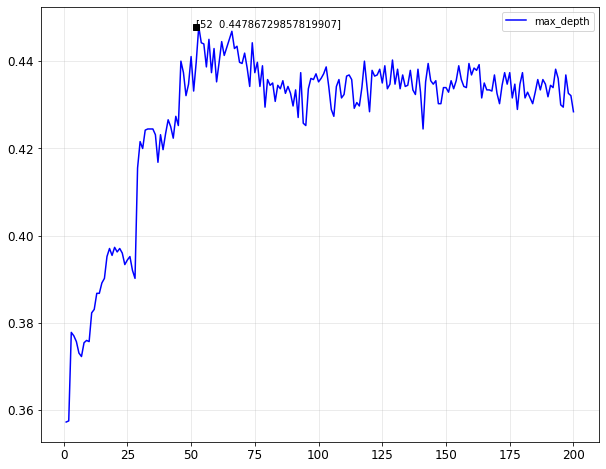

In [63]:
dt_clf = tree.DecisionTreeClassifier(criterion='gini', random_state=123)
dt_clf.fit(x_train_1_u,y_train)

import matplotlib.pyplot as plt
test=[]
for i in range(200):
    clf=tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion='gini'
                                    ,random_state=123
                                    ,splitter='random'
                                    
    )
    
    clf=clf.fit(x_train_1_f,y_train)
    score=clf.score(x_test_1_f,y_test)
    test.append(score)

    
max_index=np.argmax(test)
plt.figure(figsize=(10,8))
plt.plot(range(1,201),test,color='blue',label='max_depth')
plt.grid(alpha=0.3)
plt.legend()
plt.plot(max_index,test[max_index],'ks')
show_max= '['+str(max_index)+'  '+str(test[max_index])+']'
plt.annotate(show_max,xytext=(max_index,test[max_index]),xy=(max_index,test[max_index]))
plt.savefig('Optimization_nodes_Decision_Tree.jpg')
plt.show()

**Mark**:For an 1000 matrix sizes of TF-IDF model in unigram, it holds a maximum accuracy 44.78%, when the node generates in 52. And after aroud 50 node classes, the accuracy follows a stationary trend around the range 43% in this work.

#### Create a function to collect the four standard evaluation metrics for DT model in the normal testing results

In [65]:
def dt_test(x_train_set,x_test_set):
    
    dt_clf = tree.DecisionTreeClassifier(criterion='gini', random_state=123) #Difference between GINI <--> ENTROPY!
    dt_clf.fit(x_train_set,y_train)
    
    y_pred = dt_clf.predict(x_test_set)

    return[precision_score(y_test, y_pred, average='micro'),
           recall_score(y_test, y_pred, average='micro'),
           f1_score(y_test, y_pred, average='micro'),
           accuracy_score(y_test, y_pred)]

#### Create a function to collect the four standard evaluation metrics for DT model in the 10-fold CV testing results

**Note**: Applying 'model_selection.KFold' on the Cross-Validation testing, using for testing the 10 folds without replacement

In [66]:
def dt_cv_test(x_train_set, x_test_set):

    dt_clf = tree.DecisionTreeClassifier(criterion='gini', random_state=123)
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=123)

    dt_clf.fit(x_train_set, y_train)

    return[cross_val_score(dt_clf, x_test_set, y_test, cv=kfold, scoring='precision_weighted').mean(),
           cross_val_score(dt_clf, x_test_set, y_test, cv=kfold,
                           scoring='recall_weighted').mean(),
           cross_val_score(dt_clf, x_test_set, y_test,
                           cv=kfold, scoring='f1_weighted').mean(),
           cross_val_score(dt_clf, x_test_set, y_test, cv=kfold, scoring='accuracy').mean()]

#### Create a dataframe to capture the four standard testing results for the whole TF-IDF models in DT

In [67]:
    
dt_test_dataframe = pd.DataFrame([dt_test(x_train_1_u, x_test_1_u),
                                   dt_test(x_train_3_u, x_test_3_u),
                                   dt_test(x_train_1_b, x_test_1_b),
                                   dt_test(x_train_3_b, x_test_3_b),
                                   dt_test(x_train_1_t, x_test_1_t),
                                   dt_test(x_train_3_t, x_test_3_t),
                                   dt_test(x_train_1_f, x_test_1_f),
                                   dt_test(x_train_3_f, x_test_3_f)],
                                  columns=['Precision', 'Recall', 'F1', 'Accuracy'],
                                  index=['Unigram', '', 'Bigram', '', 'Trigram', '', 'Four-gram', ''])

dt_test_dataframe

,Precision,Recall,F1,Accuracy
Unigram,0.426277,0.426277,0.426277,0.426277
,0.398104,0.398104,0.398104,0.398104
Bigram,0.397314,0.397314,0.397314,0.397314
,0.386783,0.386783,0.386783,0.386783
Trigram,0.384676,0.384676,0.384676,0.384676
,0.404950,0.404950,0.404950,0.404950
Four-gram,0.432596,0.432596,0.432596,0.432596
,0.379410,0.379410,0.379410,0.379410


#### Create a dataframe to capture the four standard CV testing results for the whole TF-IDF models in DT

In [68]:
dt_cv_dataframe = pd.DataFrame([dt_cv_test(x_train_1_u, x_test_1_u),
                                 dt_cv_test(x_train_3_u, x_test_3_u),
                                 dt_cv_test(x_train_1_b, x_test_1_b),
                                 dt_cv_test(x_train_3_b, x_test_3_b),
                                 dt_cv_test(x_train_1_t, x_test_1_t),
                                 dt_cv_test(x_train_3_t, x_test_3_t),
                                 dt_cv_test(x_train_1_f, x_test_1_f),
                                 dt_cv_test(x_train_3_f, x_test_3_f)],
                                columns=['Precision(CV=10)', 'Recall(CV=10)', 'F1(CV=10)', 'Accuracy(CV=10)'],
                                index=['Unigram', '', 'Bigram', '', 'Trigram', '', 'Four-gram', ''])

dt_cv_dataframe

,Precision(CV=10),Recall(CV=10),F1(CV=10),Accuracy(CV=10)
Unigram,0.827899,0.826485,0.826628,0.826485
,0.875369,0.874666,0.874452,0.874666
Bigram,0.808073,0.805680,0.805938,0.805680
,0.868393,0.867548,0.867275,0.867548
Trigram,0.800095,0.797787,0.797849,0.797787
,0.861391,0.860445,0.860249,0.860445
Four-gram,0.804819,0.803057,0.802946,0.803057
,0.865039,0.864658,0.864084,0.864658


#### Create a dataframe to combine two dataframes above, columns outside the intersection will be filled by both of the first same column

In [69]:
dt_res = pd.concat([dt_test_dataframe, dt_cv_dataframe], axis=1, join='outer')
dt_res.insert(0, 'Distance', [1000, 3000, 1000, 3000, 1000, 3000, 1000, 3000])
dt_res

,Distance,Precision,Recall,F1,Accuracy,Precision(CV=10),Recall(CV=10),F1(CV=10),Accuracy(CV=10)
Unigram,1000,0.426277,0.426277,0.426277,0.426277,0.827899,0.826485,0.826628,0.826485
,3000,0.398104,0.398104,0.398104,0.398104,0.875369,0.874666,0.874452,0.874666
Bigram,1000,0.397314,0.397314,0.397314,0.397314,0.808073,0.805680,0.805938,0.805680
,3000,0.386783,0.386783,0.386783,0.386783,0.868393,0.867548,0.867275,0.867548
Trigram,1000,0.384676,0.384676,0.384676,0.384676,0.800095,0.797787,0.797849,0.797787
,3000,0.404950,0.404950,0.404950,0.404950,0.861391,0.860445,0.860249,0.860445
Four-gram,1000,0.432596,0.432596,0.432596,0.432596,0.804819,0.803057,0.802946,0.803057
,3000,0.379410,0.379410,0.379410,0.379410,0.865039,0.864658,0.864084,0.864658


#### Save the dataframe

In [126]:
dt_res.to_csv('DT_result.csv',encoding = 'utf8') 

# RF(Random Forest)
- 'Gini' uses to measure the degree of heterogeneity in RF
- The most important variable impact on the accuracy of RF classifer model is the tree selection


In [106]:
from sklearn.ensemble import RandomForestClassifier

### Accuracy Simulation 
#### To optimize the tree mumbers, here creates a loop with the number of replicates from 1 to 201 with a frequency as 10 to train each of the accuracy from 1 trees to 201 trees with a frequency 10 in RF model following 10 folds cross-validation 

**Note**: To improve the time cost, in this work, a frequecy 10 is essentially

In [91]:
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=123)
score_test = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=123)
    rfc.fit(x_train_1_u, y_train)
    score = cross_val_score(rfc, x_test_1_u, y_test, cv=kfold).mean()
    score_test.append(score)
score_max = max(score_test)

#### Drawing the learning line chart

max_score：0.8583384252187196 num_of_trees:191


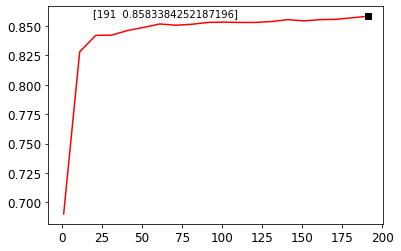

In [92]:
print('max_score：{}'.format(score_max),
      'num_of_trees:{}'.format(score_test.index(score_max)*10 + 1))
max_index=(np.argmax(score_test))
x = np.arange(1,201,10)
plt.subplot(111)
plt.plot(x, score_test, 'r-')
plt.plot(max_index*10+1,score_test[max_index],'ks')
show_max= '['+str(max_index*10+1)+'  '+str(score_test[max_index])+']'
plt.annotate(show_max,xytext=(max_index,score_test[max_index]),xy=(max_index,score_test[max_index]))
plt.savefig('Learning curve_num_trees_Random_Forest.jpg')
plt.show()

**Mark**:For an 1000 matrix sizes of TF-IDF model in unigram, the maximum accuracy of cross-validation is up to 85.83%, while the trees generates in 191. Noticing that after a rocketing by 21 trees, the accuracy follows a stationary light increasing trend around the range 84% in this work.

#### Create a function to collect the four standard evaluation metrics for RF model in the normal testing results

In [93]:
def rf_test(x_train_set,x_test_set):
    
    rf_clf = RandomForestClassifier(criterion='gini', random_state=123)
    rf_clf.fit(x_train_set,y_train)
    
    y_pred = rf_clf.predict(x_test_set)

    return[precision_score(y_test, y_pred, average='micro'),
           recall_score(y_test, y_pred, average='micro'),
           f1_score(y_test, y_pred, average='micro'),
           accuracy_score(y_test, y_pred)]

#### Create a function to collect the four standard evaluation metrics for RF model in the 10-fold CV testing results

In [94]:
def rf_cv_test(x_train_set, x_test_set):

    rf_clf = RandomForestClassifier(criterion='gini', random_state=123)
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=123)

    rf_clf.fit(x_train_set, y_train)

    return[cross_val_score(rf_clf, x_test_set, y_test, cv=kfold, scoring='precision_weighted').mean(),
           cross_val_score(rf_clf, x_test_set, y_test, cv=kfold,
                           scoring='recall_weighted').mean(),
           cross_val_score(rf_clf, x_test_set, y_test,
                           cv=kfold, scoring='f1_weighted').mean(),
           cross_val_score(rf_clf, x_test_set, y_test, cv=kfold, scoring='accuracy').mean()]

#### Create a dataframe to capture the four standard testing results for the whole TF-IDF models in RF

In [95]:
    
rf_test_dataframe = pd.DataFrame([rf_test(x_train_1_u, x_test_1_u),
                                   rf_test(x_train_3_u, x_test_3_u),
                                   rf_test(x_train_1_b, x_test_1_b),
                                   rf_test(x_train_3_b, x_test_3_b),
                                   rf_test(x_train_1_t, x_test_1_t),
                                   rf_test(x_train_3_t, x_test_3_t),
                                   rf_test(x_train_1_f, x_test_1_f),
                                   rf_test(x_train_3_f, x_test_3_f)],
                                  columns=['Precision', 'Recall', 'F1', 'Accuracy'],
                                  index=['Unigram', '', 'Bigram', '', 'Trigram', '', 'Four-gram', ''])

rf_test_dataframe

,Precision,Recall,F1,Accuracy
Unigram,0.445498,0.445498,0.445498,0.445498
,0.402844,0.402844,0.402844,0.402844
Bigram,0.397051,0.397051,0.397051,0.397051
,0.389152,0.389152,0.389152,0.389152
Trigram,0.387046,0.387046,0.387046,0.387046
,0.414165,0.414165,0.414165,0.414165
Four-gram,0.438915,0.438915,0.438915,0.438915
,0.384676,0.384676,0.384676,0.384676


#### Create a dataframe to capture the four standard CV testing results for the whole TF-IDF models in RF

In [96]:
rf_cv_dataframe = pd.DataFrame([rf_cv_test(x_train_1_u, x_test_1_u),
                                 rf_cv_test(x_train_3_u, x_test_3_u),
                                 rf_cv_test(x_train_1_b, x_test_1_b),
                                 rf_cv_test(x_train_3_b, x_test_3_b),
                                 rf_cv_test(x_train_1_t, x_test_1_t),
                                 rf_cv_test(x_train_3_t, x_test_3_t),
                                 rf_cv_test(x_train_1_f, x_test_1_f),
                                 rf_cv_test(x_train_3_f, x_test_3_f)],
                                columns=['Precision(CV=10)', 'Recall(CV=10)', 'F1(CV=10)', 'Accuracy(CV=10)'],
                                index=['Unigram', '', 'Bigram', '', 'Trigram', '', 'Four-gram', ''])

rf_cv_dataframe

,Precision(CV=10),Recall(CV=10),F1(CV=10),Accuracy(CV=10)
Unigram,0.860155,0.854386,0.852308,0.854386
,0.849259,0.840958,0.838558,0.840958
Bigram,0.852376,0.845971,0.843580,0.845971
,0.842729,0.833856,0.830888,0.833856
Trigram,0.850061,0.842811,0.840249,0.842811
,0.844093,0.836224,0.833545,0.836224
Four-gram,0.848001,0.840440,0.837844,0.840440
,0.841758,0.833849,0.831018,0.833849


#### Create a dataframe to combine two dataframes above, columns outside the intersection will be filled by both of the first same column

In [97]:
rf_res = pd.concat([rf_test_dataframe, rf_cv_dataframe], axis=1, join='outer')
rf_res.insert(0, 'Distance', [1000, 3000, 1000, 3000, 1000, 3000, 1000, 3000])
rf_res

,Distance,Precision,Recall,F1,Accuracy,Precision(CV=10),Recall(CV=10),F1(CV=10),Accuracy(CV=10)
Unigram,1000,0.445498,0.445498,0.445498,0.445498,0.860155,0.854386,0.852308,0.854386
,3000,0.402844,0.402844,0.402844,0.402844,0.849259,0.840958,0.838558,0.840958
Bigram,1000,0.397051,0.397051,0.397051,0.397051,0.852376,0.845971,0.843580,0.845971
,3000,0.389152,0.389152,0.389152,0.389152,0.842729,0.833856,0.830888,0.833856
Trigram,1000,0.387046,0.387046,0.387046,0.387046,0.850061,0.842811,0.840249,0.842811
,3000,0.414165,0.414165,0.414165,0.414165,0.844093,0.836224,0.833545,0.836224
Four-gram,1000,0.438915,0.438915,0.438915,0.438915,0.848001,0.840440,0.837844,0.840440
,3000,0.384676,0.384676,0.384676,0.384676,0.841758,0.833849,0.831018,0.833849


#### Save the dataframe

In [98]:
rf_res.to_csv('RF_result.csv',encoding = 'utf8') 

# LR(Logistic Regression)

In [99]:
from sklearn.linear_model import LogisticRegression

#### Create a function to collect the four standard evaluation metrics for LR model in the normal testing results

In [100]:
def lr_test(x_train_set,x_test_set):
    
    lr_clf = LogisticRegression()
    lr_clf.fit(x_train_set,y_train)
    
    y_pred = lr_clf.predict(x_test_set)

    return[precision_score(y_test, y_pred, average='micro'),
           recall_score(y_test, y_pred, average='micro'),
           f1_score(y_test, y_pred, average='micro'),
           accuracy_score(y_test, y_pred)]

#### Create a function to collect the four standard evaluation metrics for LR model in the 10-fold CV testing results

In [101]:
def lr_cv_test(x_train_set, x_test_set):

    lr_clf = LogisticRegression()
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=123)

    lr_clf.fit(x_train_set, y_train)

    return[cross_val_score(lr_clf, x_test_set, y_test, cv=kfold, scoring='precision_weighted').mean(),
           cross_val_score(lr_clf, x_test_set, y_test, cv=kfold,
                           scoring='recall_weighted').mean(),
           cross_val_score(lr_clf, x_test_set, y_test,
                           cv=kfold, scoring='f1_weighted').mean(),
           cross_val_score(lr_clf, x_test_set, y_test, cv=kfold, scoring='accuracy').mean()]

#### Create a dataframe to capture the four standard testing results for the whole TF-IDF models in LR

In [102]:
    
lr_test_dataframe = pd.DataFrame([lr_test(x_train_1_u, x_test_1_u),
                                   lr_test(x_train_3_u, x_test_3_u),
                                   lr_test(x_train_1_b, x_test_1_b),
                                   lr_test(x_train_3_b, x_test_3_b),
                                   lr_test(x_train_1_t, x_test_1_t),
                                   lr_test(x_train_3_t, x_test_3_t),
                                   lr_test(x_train_1_f, x_test_1_f),
                                   lr_test(x_train_3_f, x_test_3_f)],
                                  columns=['Precision', 'Recall', 'F1', 'Accuracy'],
                                  index=['Unigram', '', 'Bigram', '', 'Trigram', '', 'Four-gram', ''])

lr_test_dataframe

/Users/baihaicen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/baihaicen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

,Precision,Recall,F1,Accuracy
Unigram,0.441285,0.441285,0.441285,0.441285
,0.382833,0.382833,0.382833,0.382833
Bigram,0.403633,0.403633,0.403633,0.403633
,0.387309,0.387309,0.387309,0.387309
Trigram,0.389415,0.389415,0.389415,0.389415
,0.399157,0.399157,0.399157,0.399157
Four-gram,0.436019,0.436019,0.436019,0.436019
,0.373091,0.373091,0.373091,0.373091


#### Create a dataframe to capture the four standard CV testing results for the whole TF-IDF models in LR

In [103]:
lr_cv_dataframe = pd.DataFrame([lr_cv_test(x_train_1_u, x_test_1_u),
                                 lr_cv_test(x_train_3_u, x_test_3_u),
                                 lr_cv_test(x_train_1_b, x_test_1_b),
                                 lr_cv_test(x_train_3_b, x_test_3_b),
                                 lr_cv_test(x_train_1_t, x_test_1_t),
                                 lr_cv_test(x_train_3_t, x_test_3_t),
                                 lr_cv_test(x_train_1_f, x_test_1_f),
                                 lr_cv_test(x_train_3_f, x_test_3_f)],
                                columns=['Precision(CV=10)', 'Recall(CV=10)', 'F1(CV=10)', 'Accuracy(CV=10)'],
                                index=['Unigram', '', 'Bigram', '', 'Trigram', '', 'Four-gram', ''])

lr_cv_dataframe

/Users/baihaicen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/baihaicen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

,Precision(CV=10),Recall(CV=10),F1(CV=10),Accuracy(CV=10)
Unigram,0.801689,0.794882,0.792938,0.794882
,0.790786,0.780930,0.778130,0.780930
Bigram,0.792029,0.785399,0.783084,0.785399
,0.773436,0.764080,0.760738,0.764080
Trigram,0.790354,0.783558,0.781363,0.783558
,0.772875,0.763291,0.759766,0.763291
Four-gram,0.791268,0.784082,0.781594,0.784082
,0.773015,0.764341,0.760645,0.764341


#### Create a dataframe to combine two dataframes above, columns outside the intersection will be filled by both of the first same column

In [104]:
lr_res = pd.concat([lr_test_dataframe, lr_cv_dataframe], axis=1, join='outer')
lr_res.insert(0, 'Distance', [1000, 3000, 1000, 3000, 1000, 3000, 1000, 3000])
lr_res

,Distance,Precision,Recall,F1,Accuracy,Precision(CV=10),Recall(CV=10),F1(CV=10),Accuracy(CV=10)
Unigram,1000,0.441285,0.441285,0.441285,0.441285,0.801689,0.794882,0.792938,0.794882
,3000,0.382833,0.382833,0.382833,0.382833,0.790786,0.780930,0.778130,0.780930
Bigram,1000,0.403633,0.403633,0.403633,0.403633,0.792029,0.785399,0.783084,0.785399
,3000,0.387309,0.387309,0.387309,0.387309,0.773436,0.764080,0.760738,0.764080
Trigram,1000,0.389415,0.389415,0.389415,0.389415,0.790354,0.783558,0.781363,0.783558
,3000,0.399157,0.399157,0.399157,0.399157,0.772875,0.763291,0.759766,0.763291
Four-gram,1000,0.436019,0.436019,0.436019,0.436019,0.791268,0.784082,0.781594,0.784082
,3000,0.373091,0.373091,0.373091,0.373091,0.773015,0.764341,0.760645,0.764341


#### Save the dataframe

In [105]:
lr_res.to_csv('LR_result.csv',encoding = 'utf8') 

# The Performance of The Best Model
- Find the performance of the best models for each feature extraction method for the cross-validation testing results and the normal testing results.
- All models have utilized the larger matrix size of the dataset using 3000 matrix size of the dataset to improve our results.


In [127]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
dt = list(((dt_res.loc[dt_res['Distance']==3000]).max())[['Precision','Recall','F1','Accuracy']])
lr = list(((lr_res.loc[dt_res['Distance']==3000]).max())[['Precision','Recall','F1','Accuracy']])
knn = list(((knn_res.loc[dt_res['Distance']==3000]).max())[['Precision','Recall','F1','Accuracy']])
rf = list(((rf_res.loc[dt_res['Distance']==3000]).max())[['Precision','Recall','F1','Accuracy']])
svm = list(((svm_res.loc[dt_res['Distance']==3000]).max())[['Precision','Recall','F1','Accuracy']])

dt_cv = list(((dt_res.loc[dt_res['Distance']==3000]).max())[['Precision(CV=10)','Recall(CV=10)','F1(CV=10)','Accuracy(CV=10)']])
lr_cv = list(((lr_res.loc[dt_res['Distance']==3000]).max())[['Precision(CV=10)','Recall(CV=10)','F1(CV=10)','Accuracy(CV=10)']])
knn_cv = list(((knn_res.loc[dt_res['Distance']==3000]).max())[['Precision(CV=10)','Recall(CV=10)','F1(CV=10)','Accuracy(CV=10)']])
rf_cv = list(((rf_res.loc[dt_res['Distance']==3000]).max())[['Precision(CV=10)','Recall(CV=10)','F1(CV=10)','Accuracy(CV=10)']])
svm_cv = list(((svm_res.loc[dt_res['Distance']==3000]).max())[['Precision(CV=10)','Recall(CV=10)','F1(CV=10)','Accuracy(CV=10)']])

### The best normal testing performance

<function matplotlib.pyplot.show(close=None, block=None)>

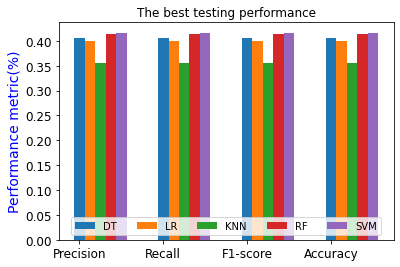

In [128]:
x = list(range(len(labels)))
total_width, n = 0.5, 4
width = total_width / n

b1 = plt.bar(x, dt, width=width, label='DT', tick_label=labels)
for i in range(len(x)):
    x[i]=x[i]+width
b2 = plt.bar(x, lr, width=width, label='LR')
for i in range(len(x)):
    x[i]=x[i]+width
b3 = plt.bar(x, knn, width=width, label='KNN')
for i in range(len(x)):
    x[i]=x[i]+width
b4 = plt.bar(x, rf, width=width, label='RF')
for i in range(len(x)):
    x[i]=x[i]+width
b5 = plt.bar(x, svm, width=width, label='SVM')

plt.legend(handles=[b1,b2,b3,b4,b5],loc="lower center",ncol=5)
plt.ylabel("Performance metric(%)",color = 'b')
plt.title("The best testing performance")
plt.savefig('The best testing performance.jpg')
plt.show

### The best cross-validaton testing performance

<function matplotlib.pyplot.show(close=None, block=None)>

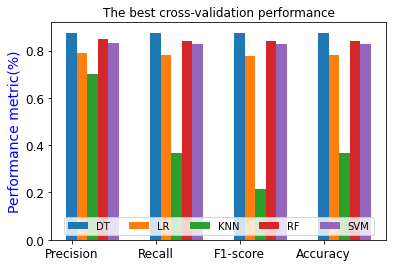

In [129]:
x = list(range(len(labels)))
total_width, n = 0.5, 4
width = total_width / n

c1 = plt.bar(x, dt_cv, width=width, label='DT', tick_label=labels)
for i in range(len(x)):
    x[i]=x[i]+width
c2 = plt.bar(x, lr_cv, width=width, label='LR')
for i in range(len(x)):
    x[i]=x[i]+width
c3 = plt.bar(x, knn_cv, width=width, label='KNN')
for i in range(len(x)):
    x[i]=x[i]+width
c4 = plt.bar(x, rf_cv, width=width, label='RF')
for i in range(len(x)):
    x[i]=x[i]+width
c5 = plt.bar(x, svm_cv, width=width, label='SVM')

plt.legend(handles=[c1,c2,c3,c4,c5],loc="lower center",ncol=5)
plt.ylabel("Performance metric(%)",color = 'b')
plt.title("The best cross-validation performance")
plt.savefig('The best cross-validation performance.jpg')
plt.show

#### Display the four standard CV testing results in RF model

In [148]:
pd.Series(rf_cv, index = ['Precision','Recall','F1','Accuracy'])

Precision    0.849259
Recall       0.840958
F1           0.838558
Accuracy     0.840958
dtype: float64

#### Display the four standard CV testing results in KNN model

In [150]:
pd.Series(knn_cv, index = ['Precision','Recall','F1','Accuracy'])

Precision    0.701398
Recall       0.368354
F1           0.214595
Accuracy     0.368354
dtype: float64

**Mark**: On average, the RF model and the SVM model have held the highest cross-validation average and the normal testing average performance respectively. Thus, the cross-validation case reached to the double of the normal testing case plausibility. For cross-validation testing results, the RF model has reached the accuracy of 84.09%, precision of 84.92%, recall of 84.09%, and F1-score of 83.85% using the unigram feature extraction method. And the KNN model reported the lowest performance results both in cross-validation testing method and normal testing method (for the cross validaton case, the accuracy of 36.83%, precision of 70.13%, recall of 36.83%, and F1-score of 21.45%).

# Conclusion
### In TF-IDF feature extraction method, the experimental results show that the RF classifer model using the unigram feature extraction method has achieved the best performance in this work.